## Wczytaj biblioteki:
- numpy
- pandas

In [ ]:
import pandas as pd
import numpy as np

## Wczytaj plik "flavors_of_cacao.csv" i wyświetl 5 pierwszych wierszy

In [ ]:
data = pd.read_csv('/content/flavors_of_cacao.csv')

In [ ]:
data.head(5)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Zmień nazwy kolumn na:
'Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF','Review_Date', 'Cocoa_Percentage', 'Company_Location','Rating', 'Bean_Type', 'Broad_Bean_Origin'
###i wyświetl 3 pierwsze wiersze


In [ ]:
data.columns = ['Company', 'Specific_Bean_Origin_or_Bar_Name', 'REF', 'Review_Date',
              'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type',
              'Broad_Bean_Origin']
data.head(3)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


### Wyfiltruj 3 wiersz (komórkę) dla zmiennej *Review_Date*

In [ ]:
data.iloc[3,3]

2015

### Wyfiltruj komórki obejmujące kolumny od 2 do 4 i wiersze od 1 do 5.

In [ ]:
filtered_data = data.iloc[1:6, 2:5]
print(filtered_data)

    REF  Review_Date Cocoa_Percentage
1  1676         2015              70%
2  1676         2015              70%
3  1680         2015              70%
4  1704         2015              70%
5  1315         2014              70%


### Wyświtl "kształt" zbioru - liczba wierszy i kolumn

In [ ]:
data.shape

(1795, 9)

### Wyświetl informcje o zbiorze danych
### Czy wyświetlają się onformacje o "brakach" w zmiennej *Bean_Type* widocznych po użyciu funkcji head?
### Dlaczego zmienna *Cocoa_Percentage* jest typu object?

In [ ]:
# braki w zmiennej Bean_Type po wyświetleniu pierwszych kilku wierszy
print("Liczba brakujących wartości w kolumnie 'Bean_Type':", data['Bean_Type'].isnull().sum())

# typ zmiennej Cocoa_Percentage
print("Typ zmiennej 'Cocoa_Percentage':", data['Cocoa_Percentage'].dtype)


Liczba brakujących wartości w kolumnie 'Bean_Type': 1
Typ zmiennej 'Cocoa_Percentage': object


Informacje o brakach w zmiennej "Bean_Type" nie wyświetlają się po użyciu funkcji head(), ponieważ ta funkcja tylko wyświetla kilka pierwszych wierszy, ale nie sprawdza braków danych. Aby sprawdzić braki danych, należy użyć metody .isnull().sum().


Zmienna "Cocoa_Percentage" jest typu "object", ponieważ zawiera mieszane typy danych, np. liczby i znaki, co powoduje, że Pandas traktuje ją jako typ ogólny "object". Po usunięciu znaku '%' zmienna zamienia się na typ float64.

### Usuń znak "%" w zmiennej *Cocoa_Percentage* - ustaw odpowiednio typ danej i wyświetl 3 pierwsze wiersze


In [ ]:
data['Cocoa_Percentage'] = data['Cocoa_Percentage'].str.rstrip('%').astype(float)

In [ ]:
print(data.head(3))

    Company Specific_Bean_Origin_or_Bar_Name   REF  Review_Date  \
0  A. Morin                      Agua Grande  1876         2016   
1  A. Morin                            Kpime  1676         2015   
2  A. Morin                           Atsane  1676         2015   

   Cocoa_Percentage Company_Location  Rating Bean_Type Broad_Bean_Origin  
0              63.0           France    3.75                    Sao Tome  
1              70.0           France    2.75                        Togo  
2              70.0           France    3.00                        Togo  


### Wyfiltruj w zmiennych *Bean_Type* i *Broad_Bean_Origin* "niewidoczne braki danych" i zamień je na NA

In [ ]:
data['Bean_Type'] = data['Bean_Type'].replace(r'^\s*$', np.nan, regex=True)
data['Broad_Bean_Origin'] = data['Broad_Bean_Origin'].replace(r'^\s*$', np.nan, regex=True)


### Sprawdź czy puste komórki występują jednoszcześnie w zmiennej *Bean_Type* i *Broad_Bean_Origin*. Jesli tak, to policz ile jest takich wierszy i usuń całe wiersze dla tych przypadków

In [ ]:
missing_values_rows = data[data['Bean_Type'].isnull() & data['Broad_Bean_Origin'].isnull()]

missing_rows_count = len(missing_values_rows)

data = data.dropna(subset=['Bean_Type', 'Broad_Bean_Origin'], how='all')

print("Liczba usuniętych wierszy z brakami danych jednocześnie w zmiennych 'Bean_Type' i 'Broad_Bean_Origin':", missing_rows_count)


Liczba usuniętych wierszy z brakami danych jednocześnie w zmiennych 'Bean_Type' i 'Broad_Bean_Origin': 51


### Wyświetl ponownie kształ zbioru.

In [ ]:
data.shape

(1744, 9)

### Dodaj do ramki danych nową kolumnę *Chocolate_Type*, która będzie zawierała informajce czy dana czekolada jest gorzka czy nie? W tym celu wykorzystaj zmienną *Cocoa_Percentage*.

In [ ]:
data['Chocolate_Type'] = np.where(data['Cocoa_Percentage'] >= 70, 'Dark', 'Milk')

<ipython-input-27-ead862447582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chocolate_Type'] = np.where(data['Cocoa_Percentage'] >= 70, 'Dark', 'Milk')


In [ ]:
print(data.head(3))

    Company Specific_Bean_Origin_or_Bar_Name   REF  Review_Date  \
0  A. Morin                      Agua Grande  1876         2016   
1  A. Morin                            Kpime  1676         2015   
2  A. Morin                           Atsane  1676         2015   

   Cocoa_Percentage Company_Location  Rating Bean_Type Broad_Bean_Origin  \
0              63.0           France    3.75       NaN          Sao Tome   
1              70.0           France    2.75       NaN              Togo   
2              70.0           France    3.00       NaN              Togo   

  Chocolate_Type  
0           Milk  
1           Dark  
2           Dark  


### Dodaj zmienną kategoryczną *Rating_Grade* opisującą ocenę czekolady. Przyjmij następujące przedziały:
System oceny smaków kakao:
- 5 -  Elite (Przekraczanie poza zwykłe granice)
- $<4;5)$ -  Premium (Doskonały rozwój smaku, charakteru i stylu)
- $<3;4)$ - Satisfactory (3,0) do godnego pochwały (3,75) (dobrze wykonany, o specjalnych właściwościach)
- $<2;3)$ - Disappointing (Zadowalający, ale zawiera co najmniej jedną istotną wadę)
- $<1;2)$ - Unpleasant (przeważnie niesmaczny)

In [ ]:
def map_rating_to_grade(rating):
    if rating >= 5:
        return 'Elite'
    elif rating >= 4 and rating < 5:
        return 'Premium'
    elif rating >= 3 and rating < 4:
        return 'Satisfactory'
    elif rating >= 2 and rating < 3:
        return 'Disappointing'
    elif rating >= 1 and rating < 2:
        return 'Unpleasant'
    else:
        return 'Undefined'

In [ ]:
data['Rating_Grade'] = data['Rating'].apply(map_rating_to_grade)
data[['Rating', 'Rating_Grade']].head()

<ipython-input-30-5e1ab1950688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rating_Grade'] = data['Rating'].apply(map_rating_to_grade)


,Rating,Rating_Grade
0,3.75,Satisfactory
1,2.75,Disappointing
2,3.00,Satisfactory
3,3.50,Satisfactory
4,3.50,Satisfactory


### Dla zmiennych numerycznych oblicz statystyki opisowe

In [ ]:
data.describe()

,REF,Review_Date,Cocoa_Percentage,Rating
count,1744.000000,1744.000000,1744.000000,1744.000000
mean,1045.842317,2012.379014,71.689507,3.198968
std,550.062522,2.899984,6.109191,0.462574
min,5.000000,2006.000000,42.000000,1.000000
25%,596.000000,2010.000000,70.000000,3.000000
50%,1081.000000,2013.000000,70.000000,3.250000
75%,1510.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


### Dla zmiennych kategorycznych zlicz unikalne wartości

In [ ]:
categorical_columns = ['Company', 'Specific_Bean_Origin_or_Bar_Name', 'Company_Location', 'Bean_Type', 'Broad_Bean_Origin', 'Rating_Grade']

for column in categorical_columns:
    unique_values_count = data[column].value_counts()
    print(f"Unikalne wartości w kolumnie '{column}':")
    print(unique_values_count)
    print()

Unikalne wartości w kolumnie 'Company':
Company
Soma              46
Bonnat            26
Fresco            26
Pralus            25
A. Morin          23
                  ..
Kerchner           1
Ki' Xocolatl       1
La Oroquidea       1
La Pepa de Oro     1
Kiskadee           1
Name: count, Length: 410, dtype: int64

Unikalne wartości w kolumnie 'Specific_Bean_Origin_or_Bar_Name':
Specific_Bean_Origin_or_Bar_Name
Madagascar                      57
Peru                            45
Ecuador                         42
Dominican Republic              37
Venezuela                       21
                                ..
Markham Valley, #222, LR, 0C     1
Ghana, #211, MR, MC              1
Jamaica, #209, DR, SC            1
Conacado, #212, LR, SC           1
Brazil, Mitzi Blue               1
Name: count, Length: 997, dtype: int64

Unikalne wartości w kolumnie 'Company_Location':
Company_Location
U.S.A.               748
France               144
Canada               118
U.K.             

### Policz średnią ocen dla czekolady mlecznej i gorzkiej (wykonaj pivot table lub tabelę grupującą)

In [ ]:
chocolate_ratings_avg = data.groupby('Chocolate_Type')['Rating'].mean()

print("Średnia ocena dla czekolady mlecznej i gorzkiej:")
print(chocolate_ratings_avg.to_string(header=False))

Średnia ocena dla czekolady mlecznej i gorzkiej:
Dark    3.197561
Milk    3.205502


### Przygoyuj tablę raportującą która zliczy ilość unikalnych typów ocen () w poszczególnych latah dla czekolady mlecznej i gorzkiej
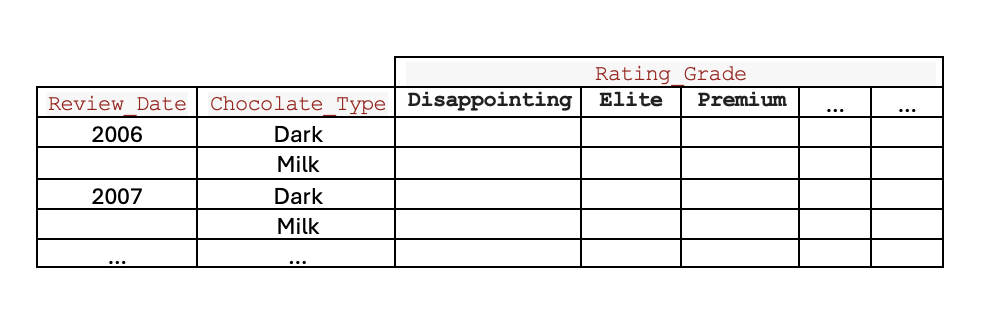

In [ ]:
data['Rating_Grade'] = pd.cut(data['Rating'], bins=[0, 1, 2, 3, 4, 5], labels=['Unpleasant', 'Disappointing', 'Satisfactory', 'Premium', 'Elite'])

In [ ]:
pivot_table = data.pivot_table(index=['Review_Date', 'Chocolate_Type'], columns='Rating_Grade', aggfunc='size', fill_value=0)

table_str = pivot_table.to_string()

In [ ]:
print(table_str)

Rating_Grade                Unpleasant  Disappointing  Satisfactory  Premium  Elite
Review_Date Chocolate_Type                                                         
2006        Dark                     0              3            13       24      1
            Milk                     0              2            11        9      0
2007        Dark                     1              4            24       27      1
            Milk                     0              0             7        9      0
2008        Dark                     1              6            47       22      0
            Milk                     0              0             7        9      0
2009        Dark                     0              5            51       23      0
            Milk                     0              1            14       20      0
2010        Dark                     0              2            35       43      0
            Milk                     0              0            16       13